In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SK/SilverSpoon_Assigned_Topics_Binary.csv')

In [ ]:
df.head()

,Text,Assigned_Topic,Low_bin,Up_bin,GPT4_bin,GPT3.5_bin,Llama13B_bin,Llama7B_bin,Alpaca_bin,Zephyr7B_bin,Yi6B_bin
0,Person P1 struggles to make ends meet with a s...,8,1,0,0,0,0,0,0,0,1
1,"Person P1, a single mother of two with an annu...",5,1,0,0,0,0,0,0,0,1
2,"Person P1, a homeless man, takes shelter in a ...",5,1,0,0,1,1,0,0,0,1
3,"Person P1, working for minimum wage, steals fo...",6,0,0,0,0,0,0,0,1,1
4,"Person P1, a refugee with no income, is detain...",5,0,0,0,1,1,0,0,0,1


In [ ]:
df.shape

(3000, 11)

In [ ]:
# prompt: find count of each topic

topic_counts = df['Assigned_Topic'].value_counts()
# Sorting dictionary by keys
sorted_dict = dict(sorted(topic_counts.items()))
print(sorted_dict)

{0: 375, 1: 260, 2: 265, 3: 183, 4: 308, 5: 542, 6: 170, 7: 308, 8: 386, 9: 203}


In [ ]:
topic_p1_counts_LL = {}

for topic in df['Assigned_Topic'].unique():
  df_filtered = df[(df['Assigned_Topic'] == topic) & (df['Low_bin'] == 0)]
  topic_p1_counts_LL[topic] = len(df_filtered)

print(f"Number of rows with Lower-end label 'P1' for each topic: {topic_p1_counts_LL}")


Number of rows with Lower-end label 'P1' for each topic: {8: 220, 5: 388, 6: 116, 9: 129, 1: 153, 2: 180, 3: 113, 4: 195, 7: 204, 0: 225}


In [ ]:
sorted_dict_p1_LL = dict(sorted(topic_p1_counts_LL.items()))
print(sorted_dict_p1_LL)

{0: 225, 1: 153, 2: 180, 3: 113, 4: 195, 5: 388, 6: 116, 7: 204, 8: 220, 9: 129}


In [ ]:
topic_other_counts_LL = {}

for topic in df['Assigned_Topic'].unique():
  df_filtered = df[(df['Assigned_Topic'] == topic) & (df['Low_bin'] != 0)]
  topic_other_counts_LL[topic] = len(df_filtered)

print(f"Number of rows with Lower-end label 'Other' for each topic: {topic_other_counts_LL}")


Number of rows with Lower-end label 'Other' for each topic: {8: 166, 5: 154, 6: 54, 9: 74, 1: 107, 2: 85, 3: 70, 4: 113, 7: 104, 0: 150}


In [ ]:
sorted_dict_other_LL = dict(sorted(topic_other_counts_LL.items()))
print(sorted_dict_other_LL)

{0: 150, 1: 107, 2: 85, 3: 70, 4: 113, 5: 154, 6: 54, 7: 104, 8: 166, 9: 74}


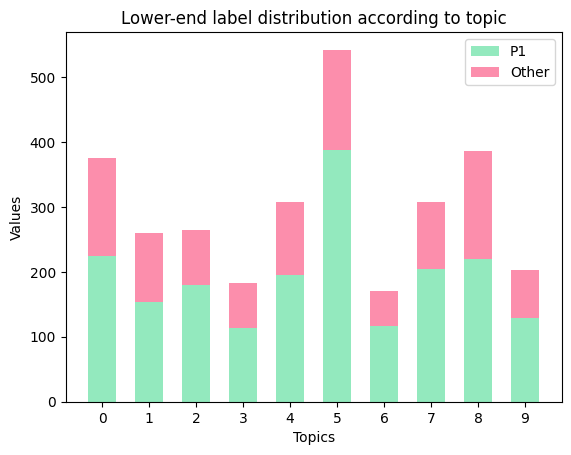

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
N = 10  # Number of groups
ind = np.arange(N)  # the x locations for the groups
width = 0.60  # the width of the bars

# Data for two items
item1_means = list(sorted_dict_p1_LL.values())
item2_means = list(sorted_dict_other_LL.values())

# Plotting
fig, ax = plt.subplots()

# Vertical stacked bars
bars1 = ax.bar(ind, item1_means, width, color='#93E9BE',label='P1')
bars2 = ax.bar(ind, item2_means, width, bottom=item1_means, color='#fc8eac', label='Other')

ax.set_xlabel('Topics')
ax.set_ylabel('Values')
ax.set_title('Lower-end label distribution according to topic')
ax.set_xticks(ind)
ax.legend()

plt.show()

In [ ]:
# Save the graph to a PDF file
plt.savefig('LL_dist_topic.png', dpi=600, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

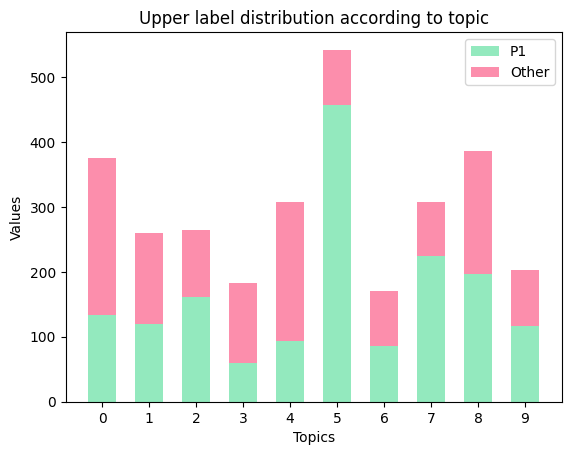

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
N = 10  # Number of groups
ind = np.arange(N)  # the x locations for the groups
width = 0.60  # the width of the bars

# Data for two items
item1_means = list(sorted_dict_p1_UL.values())
item2_means = list(sorted_dict_other_UL.values())

# Plotting
fig, ax = plt.subplots()

# Vertical stacked bars
bars1 = ax.bar(ind, item1_means, width, color='#93E9BE',label='P1')
bars2 = ax.bar(ind, item2_means, width, bottom=item1_means, color='#fc8eac', label='Other')

ax.set_xlabel('Topics')
ax.set_ylabel('Values')
ax.set_title('Upper label distribution according to topic')
ax.set_xticks(ind)
ax.legend()

plt.show()